# Forecast the stock price of LGI in Oct 2024 after 1 year of listing on ASX

In [6]:
# preparing data
!pip install yfinance
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the parameters
ticker = 'LGI.AX'  
t_intervals = 252  # forecast period of 1 year
iterations = 10000  # Number of Monte Carlo simulations

# Set the random seed 
np.random.seed(456)  

# Using one year of historical data after Listing on ASX
stock_data = yf.download(ticker, start='2022-10-04', end='2023-10-06')
returns = stock_data['Adj Close'].pct_change().dropna()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 32.8 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peewee: filename=peewee-3.17.0-cp310-cp310-linux_x86_64.whl size=290462 sha256=6816555c2786b98afcdc82efeaf4cd48270062c4d8a6cd5b8939a33c8f484794
  Stored in directory: /root/.cache/pip/wheels/c7/70/ad/212867e96e7004265a69c4aa5dcff00a95f547a67ba26e7e76
Successfully built peewee
[*********************100%%**********************]  1 of 1 completed


In [7]:
# Calculate mean and standard deviation of returns
mean_return = returns.mean()
std_dev = returns.std()

# Perform Monte Carlo simulation
daily_returns = np.exp(mean_return + std_dev * np.random.normal(0, 1, (t_intervals, iterations)))

# Set the last available stock price as the initial price
initial_price = stock_data['Adj Close'].iloc[-1]

# Create an array to store the simulated prices
price_matrix = np.zeros_like(daily_returns)
price_matrix[0] = initial_price

# Generate price matrix using Monte Carlo simulation
for t in range(1, t_intervals):
    price_matrix[t] = price_matrix[t - 1] * daily_returns[t]

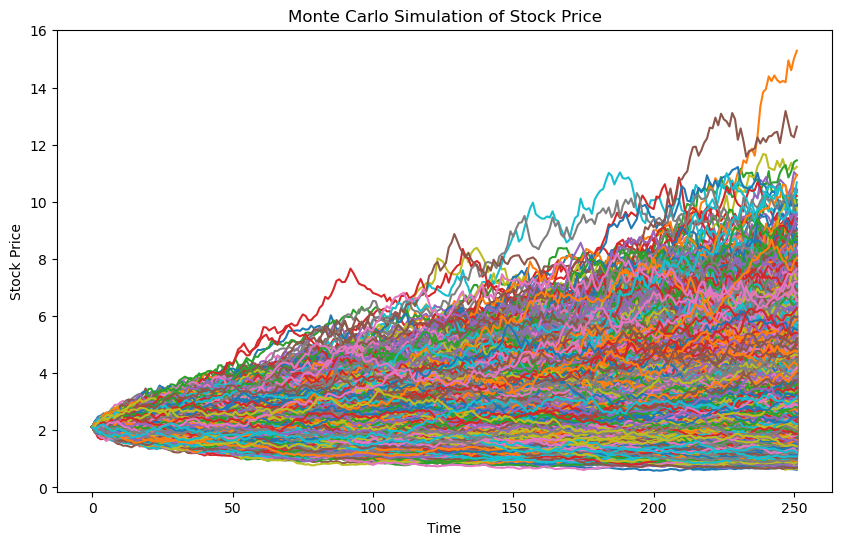

In [8]:
# Plot the Monte Carlo simulation results
plt.figure(figsize=(10, 6))
plt.plot(price_matrix)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Monte Carlo Simulation of Stock Price')
plt.show()

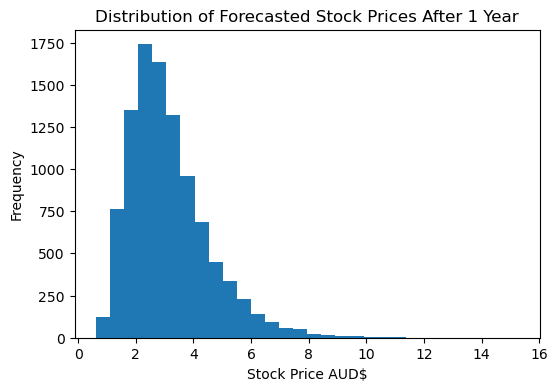

In [9]:
# Plot Distribution of the Monte Carlo simulation results after 1 tear
plt.figure(figsize=(6, 4))
plt.hist(price_matrix[-1], bins=30)
plt.xlabel('Stock Price AUD$')
plt.ylabel('Frequency')
plt.title('Distribution of Forecasted Stock Prices After 1 Year')
plt.show()

It is right shewed histrogram with the mode around $2.5

[*********************100%%**********************]  1 of 1 completed


Text(0.5, 1.0, 'Stock Price of LGI LIMITED since listed on ASX')

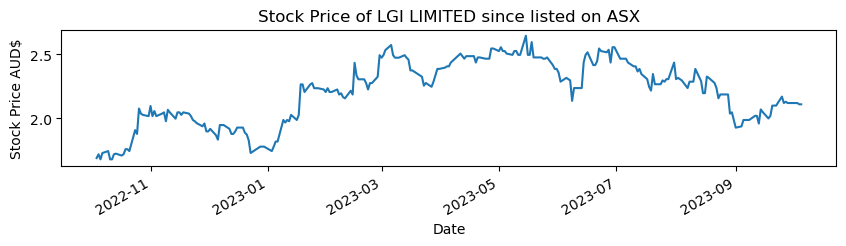

In [11]:
#Visualization

dj_Close_stockdata = yf.download(ticker, start='2022-10-04', end='2023-10-06')['Adj Close']
dj_Close_stockdata.plot(figsize=(10,2));
plt.xlabel('Date')
plt.ylabel('Stock Price AUD$')
plt.title('Stock Price of LGI LIMITED since listed on ASX')

In [12]:
median_forecast = np.median(price_matrix[-1])

In [13]:
median_forecast

2.878208729967497

In [14]:
lower_percentile = np.percentile(price_matrix[-1], 5)
upper_percentile = np.percentile(price_matrix[-1], 95)

In [15]:
#Bottom 5% of the forecast
lower_percentile

1.419646213832382

In [16]:
#Top 5% of the forecast
upper_percentile

5.775584966725872

# Summary

This is a follow-up research based on LGI's "BFF3351 Initial Public Offering Prospectus Evaluation" on 06/07/2023.

    -> https://bitly.ws/WKoA (Document)
    -> https://bitly.ws/WKoC (Appendix)

After the public offering of **AUD1.5** on 4/10/2022, the current price of LGI Limited is **AUD2.1** as of 6/10/2023, after 1 year.

However, the forecasted stock price for Oct 2024 is expected to surge to **AUD2.878**, using the median forecast of the Monte Carlo simulation. Moreover, the forecasted stock price has a very high top 5% estimate of AUD5.78 and a comparatively low bottom 5% estimate of AUD1.42.